<a href="https://colab.research.google.com/github/ROzenSaglam/Face_detection/blob/main/image_detection_first_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 47.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.4/361.4 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 11.9 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.1.1-py3-none-any.whl size=1466366 sha256=33c78e8bc61acdfa87b1ec3449c83a89701846e50e29133b83d4df4ef6c43f72
  Stored in directory: /root/.cache/pip/wheels/73/89/84/442d4814015c451509500658c0cbe3aff0c

In [ ]:
# 1. Collecting Images

import os
import time
import uuid
import cv2

print("Successfully imported!")

Successfully imported!


In [ ]:
import json
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf


In [ ]:
image_path = os.path.join('data','image')
number_images = 30

NameError: ignored

[]

In [ ]:
images = tf.data.Dataset.list_files('/content/drive/MyDrive/data/image/*.jpg', shuffle = False)

InvalidArgumentError: ignored

In [ ]:
images.as_numpy_iterator().next()

NameError: ignored

In [ ]:
#to read an image, decode it and reshape the tensor containing the pixel data:

def load_image(x):
  raw = tf.io.read_file(x)
  img = tf.image.decode_jpeg(raw)

  return img

In [ ]:
images = images.map(load_image)

NameError: ignored

In [ ]:
images.as_numpy_iterator().next()


NameError: ignored

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

NameError: ignored

In [ ]:
plt_img = image_generator.next()

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, image in enumerate(plt_img):
  ax[idx].imshow(image)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"


'Başlıksız e-tablo.gsheet'
'CHARACTERIZATION OF IPN BASED LEVAN.docx'
'CHARACTERIZATION OF IPN BASED LEVAN ETO.docx'
'CIRRICULUM VITAE.docx'
'Colab Notebooks'
 data
'revised manuscript compressed_SG.docx'
'revised manuscript.docx'
'Saglam et al manuscript ETO.docx'
'WhatsApp Image 2022-06-27 at 18.11.54.jpeg'


In [ ]:
#moving matching labels:

for folder in ['train', 'test', 'valid']:
  for file in os.listdir(os.path.join('drive','MyDrive','data', folder, 'image')):
    filename = file.split('.')[0]+'.json'
    existing_filepath = os.path.join('drive','MyDrive','data', 'label', filename)
    if os.path.exists(existing_filepath):
      new_filepath = os.path.join('drive','MyDrive','data', folder, 'label', filename)
      os.replace(existing_filepath, new_filepath)

Apply Image Augmentation on Images and Labels

In [ ]:
import albumentations as alb

Augmentation Pipeline:

In [ ]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

augmentor = alb.Compose([alb.HorizontalFlip(p=0.5),
             alb.RandomBrightnessContrast(p=0.3),
             alb.RandomCrop(width=700, height=700)],
             bbox_params=alb.BboxParams(format='albumentations', label_fields = ['class_labels']))


Test an Image & Annotation

In [ ]:
img = cv2.imread(os.path.join('drive','MyDrive','data','train','image','27f557a6-850c-11ed-95e4-1e00f1349d90.jpg'))

with open(os.path.join('drive','MyDrive','data','train','label','27f557a6-850c-11ed-95e4-1e00f1349d90.json'), 'r') as f:
  label = json.load(f)


In [ ]:
type(img)

numpy.ndarray

In [ ]:
img

array([[ 76,  87, 101],
       [ 73,  84,  98],
       [ 90,  99, 113],
       ...,
       [125, 131, 136],
       [129, 135, 140],
       [122, 128, 133]], dtype=uint8)

In [ ]:
filee = '27f557a6-850c-11ed-95e4-1e00f1349d90.jpg'
new_file = (filee.split('.'))[0]
new_file
name = f'{new_file}.json'
name

'27f557a6-850c-11ed-95e4-1e00f1349d90.json'

In [ ]:
label['shapes'][0]['points']

[[528.3720930232558, 153.60465116279073],
 [787.6744186046512, 496.62790697674416]]

take the coordinates as a list from the dict 'label'

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords

[528.3720930232558, 153.60465116279073, 787.6744186046512, 496.62790697674416]

normalize the coordinates by dividing x with width and y with height of the image

In [ ]:
type(img)

(720, 1280, 3)

In [ ]:
coords = list(np.divide( coords, [1280,720,1280,720]))

In [ ]:
coords

[0.4127906976744186,
 0.21333979328165378,
 0.6153706395348838,
 0.6897609819121446]

In [ ]:
type(coords)

list

try augmentation pipeline

In [ ]:
type(img)

numpy.ndarray

In [ ]:
aug = augmentor(image = img, bboxes=[coords], class_labels = ['face'])
cv2.rectangle(aug['image'],
              tuple(np.multiply(aug['bboxes'][0][:2], [700,700]).astype(int)),
              tuple(np.multiply(aug['bboxes'][0][2:], [700,700]).astype(int)),
              (0,255,0),2)

NameError: ignored

Build an Augmentation Pipeline for all images

In [ ]:
labels = []
type(labels)

list

In [ ]:
filee = '27f557a6-850c-11ed-95e4-1e00f1349d90.jpg'
new_file = (filee.split('.'))[0]
new_file
name = f'{new_file}.json'
name

In [ ]:


for folder in ['train', 'test', 'valid']:
  for files in os.listdir(os.path.join('drive','MyDrive','data', folder, 'image')):
    img = cv2.imread(os.path.join('drive','MyDrive','data', folder,'image', files))
    label_path = os.path.join('drive','MyDrive','data', folder,'label', f'{(files.split("."))[0]}.json')
    coords = [0,0,0.000001,0.000001]
    if os.path.exists(label_path):
      with open(label_path, 'r') as f:
        label = json.load(f)
      coords[0] = label['shapes'][0]['points'][0][0]
      coords[1] = label['shapes'][0]['points'][0][1]
      coords[2] = label['shapes'][0]['points'][1][0]
      coords[3] = label['shapes'][0]['points'][1][1]
      coords = list(np.divide(coords, [1280, 720, 1280, 720]))

    try:
      for x in range(60):
        augmented = augmentor(image = img, bboxes = [coords], class_labels = ['face'])
        cv2.imwrite(os.path.join('drive','MyDrive','data','aug_data',folder,'image', f'{(files.split("."))[0]}_{x}.jpg'), augmented['image'])
        annotation = {}
        annotation['image'] = files
        if os.path.exists(label_path):
          if len(augmented['bboxes']) == 0:
            annotation['bbox'] = [0,0,0,0]
            annotation['class'] = 0
          else:
            annotation['bbox'] = augmented['bboxes'][0]
            annotation['class'] = 1
        else:
          annotation['bbox'] = [0,0,0,0]
          annotation['class'] = 0

        with open(os.path.join('drive','MyDrive','data','aug_data',folder,'label', f'{(files.split("."))[0]}_{x}.json'), 'w') as f:
          json.dump(annotation, f)
    except Exception as e:
      print(e)





Define a image resizing funtion for your images

In [ ]:
  def normalize_image(image):
    return tf.image.resize(image, (120,120))


In [ ]:
#to read an image, decode it and reshape the tensor containing the pixel data:

def load_image(x):
  raw = tf.io.read_file(x)
  img = tf.image.decode_jpeg(raw)

  return img

# Load the files,
#turn them into TensorSliceDataset
#and normalize the image size and color::

In [ ]:



try:
  train_images = tf.data.Dataset.list_files("/content/drive/MyDrive/data/aug_data/train/image/*.jpg", shuffle = False)
  train_images = train_images.map(load_image)
  train_images = train_images.map(normalize_image)
  train_images = train_images.map(lambda x: x/255)

except Exception as e :
  print(e)





In [ ]:

try:
  test_images = tf.data.Dataset.list_files("/content/drive/MyDrive/data/aug_data/test/image/*.jpg", shuffle = False)
  test_images = test_images.map(load_image)
  test_images = test_images.map(normalize_image)
  test_images = test_images.map(lambda x: x/255)

except Exception as e :
  print(e)



In [ ]:

try:
  valid_images = tf.data.Dataset.list_files("/content/drive/MyDrive/data/aug_data/valid/image/*.jpg", shuffle = False)
  valid_images = valid_images.map(load_image)
  valid_images = valid_images.map(normalize_image)
  valid_images = valid_images.map(lambda x: x/255)

except Exception as e :
  print(e)

In [ ]:
len(train_images),len(valid_images),len(test_images)

(3780, 780, 840)

# Load the labels, return the class and bboxes data :

In [ ]:

def read_label(label_path):
  with open(label_path.numpy(), 'r', encoding= 'utf-8') as f:
    label = json.load(f)

  return [label['class']], label['bbox']


In [ ]:
read_label("/content/drive/MyDrive/data/aug_data/train/label/27f557a6-850c-11ed-95e4-1e00f1349d90_0.json")


([1],
 [0.18053156146179405,
  0.2137209302325582,
  0.5509634551495017,
  0.7037541528239202])

In [ ]:
train_labels = tf.data.Dataset.list_files("/content/drive/MyDrive/data/aug_data/train/label/*.json", shuffle = False)
train_labels = train_labels.map(lambda x: tf.py_function(func = read_label, inp = [x], Tout = [tf.uint8, tf.float16]))

valid_labels = tf.data.Dataset.list_files("/content/drive/MyDrive/data/aug_data/valid/label/*.json", shuffle = False)
valid_labels = valid_labels.map(lambda x: tf.py_function(func = read_label, inp = [x], Tout = [tf.uint8, tf.float16]))

test_labels = tf.data.Dataset.list_files("/content/drive/MyDrive/data/aug_data/test/label/*.json", shuffle = False)
test_labels = test_labels.map(lambda x: tf.py_function(func = read_label, inp = [x], Tout = [tf.uint8, tf.float16]))


In [ ]:
test_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.5273, 0.4678, 0.7056, 0.7466], dtype=float16))

In [ ]:
len(train_labels),len(valid_labels),len(test_labels)

(3780, 780, 840)

COmbine Label and Image Samples

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(4000)
train = train.batch(8)
train = train.prefetch(4)

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(900)
test = test.batch(8)
test = test.prefetch(4)

valid = tf.data.Dataset.zip((valid_images, valid_labels))
valid = valid.shuffle(800)
valid = valid.batch(8)
valid = valid.prefetch(4)

In [ ]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()

fig, ax =plt.subplots(ncols = 4, figsize=(20,20))
for idx in range(4):
  sample_image = res[0][idx]
  sample_coords = res[1][1][idx]

  cv2.rectangle(sample_image,
                tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                tuple(np.multiply(sample_coords[2:],[120,120]).astype(int)),
                (255,0,0),2)

  ax[idx].imshow(sample_image)

#Build Deep Learning Model
With the combination of both Classification and Regression

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [ ]:
vgg = VGG16(include_top = False)

Our CNN

In [ ]:
def build_model():
  input_layer = Input(shape=(120,120,3))
  vgg = VGG16(include_top = False)(input_layer)

  #Classification Model:
  f1 = GlobalMaxPooling2D()(vgg)
  class1 = Dense(2048, activation= 'relu')(f1)
  class2 = Dense(1, activation = 'sigmoid')(class1)

  #Regression Model:
  f2 = GlobalMaxPooling2D()(vgg)
  regress1 = Dense(2048, activation = 'relu')(f2)
  regress2 = Dense(4, activation = 'sigmoid')(regress1)

  facetracker = Model(inputs= input_layer, outputs = [class2, regress2])
  return facetracker

In [ ]:
facetracker = build_model()
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [ ]:
train.as_numpy_iterator().next()[1]

(array([[[[0.68858933, 0.60231483, 0.5199619 ],
          [0.6901961 , 0.6039216 , 0.5137255 ],
          [0.6901961 , 0.6039216 , 0.52156866],
          ...,
          [0.74967283, 0.67908454, 0.5849669 ],
          [0.7480392 , 0.6696078 , 0.5754902 ],
          [0.7543027 , 0.6758713 , 0.5817537 ]],
 
         [[0.691585  , 0.6053105 , 0.52295756],
          [0.68921566, 0.60294116, 0.5127451 ],
          [0.6928105 , 0.606536  , 0.52418303],
          ...,
          [0.7677292 , 0.68929785, 0.5951802 ],
          [0.7558824 , 0.67745095, 0.5833333 ],
          [0.7555554 , 0.677124  , 0.5830064 ]],
 
         [[0.7019608 , 0.6156863 , 0.53333336],
          [0.6901961 , 0.6039216 , 0.5137255 ],
          [0.69773966, 0.61146516, 0.5291122 ],
          ...,
          [0.7428373 , 0.66440594, 0.57028824],
          [0.74991834, 0.671487  , 0.5773693 ],
          [0.7441175 , 0.66568613, 0.5715685 ]],
 
         ...,
 
         [[0.37154156, 0.34409058, 0.32056117],
          [0.26593

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:
X.shape

(8, 120, 120, 3)

In [ ]:
y

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8), array([[0.1527 , 0.2703 , 0.435  , 0.6904 ],
        [0.853  , 0.414  , 1.     , 0.766  ],
        [0.633  , 0.2412 , 0.927  , 0.683  ],
        [0.03047, 0.2369 , 0.3245 , 0.6787 ],
        [0.     , 0.6733 , 0.33   , 0.932  ],
        [0.3286 , 0.2793 , 0.6973 , 0.8174 ],
        [0.6187 , 0.3872 , 1.     , 0.751  ],
        [0.5117 , 0.5557 , 0.912  , 0.8384 ]], dtype=float16))

In [ ]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 1s/step


In [ ]:
classes, coords

(array([[0.59620464],
        [0.5767364 ],
        [0.590067  ],
        [0.53187156],
        [0.59976584],
        [0.6425752 ],
        [0.58045113],
        [0.61805093]], dtype=float32),
 array([[0.49742946, 0.39605537, 0.3157947 , 0.4283217 ],
        [0.527112  , 0.47794154, 0.38922086, 0.49365085],
        [0.4835826 , 0.46381503, 0.2865837 , 0.46406433],
        [0.4719864 , 0.46675166, 0.2849773 , 0.44604418],
        [0.5435453 , 0.43040943, 0.323467  , 0.49218366],
        [0.48468554, 0.42463756, 0.26803178, 0.44905755],
        [0.37775433, 0.4650728 , 0.25799856, 0.48673385],
        [0.5239847 , 0.478245  , 0.3340982 , 0.47023058]], dtype=float32))

Define Lossesand Optimizers


In [ ]:
from tensorflow.keras.optimizers import Adam
Batches_per_epoch = len(train)
lr_decay = (1./0.75-1)/Batches_per_epoch
opt = tf.keras.optimizers.Adam(learning_rate = 0.01,
                                     decay = lr_decay)

In [ ]:
#Localization Loss:

def loc_loss(y_true, yhat):
  delta_coord = tf.reduce_sum(tf.square(y_true[:,:2]-yhat[:,:2]))

  h_true = y_true[:,3] - y_true[:,1]
  w_true = y_true[:,2] - y_true[:,0]

  h_pred = yhat[:,3] - yhat[:,1]
  w_pred = yhat[:,2] - yhat[:,0]

  delta_size = tf.reduce_sum(tf.square(w_true-w_pred) + (h_true-h_pred))
  return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = loc_loss

#Train Neural Network

In [ ]:
class Facetracker(Model):
  def __init__(self, eyetracker,  **kwargs):
    super().__init__(**kwargs)
    self.model = eyetracker
  def compile(self, opt, classloss, regressloss, **kwargs):
    super().compile(**kwargs)
    self.closs = classloss
    self.lloss = regressloss
    self.opt = opt
  def train_step(self, batch, **kwargs):
    X, y = batch
    with tf.GradientTape() as tape:
      #Make predictions:
      classes, coords = self.model(X, training = True)
      #Calculate the loss:
      batch_classloss = self.closs(y[0], classes)
      batch_locloss = self.lloss(tf.cast(y[1], tf.float32), coords)
      total_loss = batch_classloss*0.5 + batch_locloss
      #calculate the gradients:
      grad = tape.gradient(total_loss, self.model.trainable_variables)
      #loop through each variable:
      opt.apply_gradients(zip(grad, self.model.trainable_variables))

      return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_locloss}

  def test_step(self, batch, **kwargs):
    X, y = batch
    classes, coords = self.model(X, training = False)
    batch_classloss = self.closs(y[0], classes)
    batch_locloss = self.lloss(tf.cast(y[1], tf.float32), coords)
    total_loss = batch_classloss*0.5 + batch_locloss
    return {"total_val_loss":total_loss, "val_class_loss":batch_classloss, "val_regress_loss":batch_locloss}





In [ ]:
model = Facetracker(facetracker)

In [ ]:
model.compile(opt, classloss, loc_loss)

Train

In [ ]:
hist = model.fit(train.take(100), epochs = 10, validation_data = valid)

Epoch 1/10
100/100 [==============================] - 623s 6s/step - total_loss: 2.8497 - class_loss: 2.5667 - regress_loss: 1.5664 - val_total_val_loss: 0.4851 - val_val_class_loss: 0.0000e+00 - val_val_regress_loss: 0.4851
Epoch 2/10
100/100 [==============================] - 615s 6s/step - total_loss: 2.8453 - class_loss: 2.4157 - regress_loss: 1.6374 - val_total_val_loss: 0.8023 - val_val_class_loss: 0.0000e+00 - val_val_regress_loss: 0.8023
Epoch 3/10
100/100 [==============================] - 621s 6s/step - total_loss: 2.9114 - class_loss: 2.1892 - regress_loss: 1.8168 - val_total_val_loss: 0.7336 - val_val_class_loss: 0.0000e+00 - val_val_regress_loss: 0.7336
Epoch 4/10
100/100 [==============================] - 617s 6s/step - total_loss: 2.8507 - class_loss: 2.3780 - regress_loss: 1.6617 - val_total_val_loss: 0.9313 - val_val_class_loss: 0.0000e+00 - val_val_regress_loss: 0.9313
Epoch 5/10
100/100 [==============================] - 619s 6s/step - total_loss: 2.8029 - class_loss

In [ ]:
hist.history

{'total_loss': [2.371978998184204,
  1.149691104888916,
  0.5329248905181885,
  3.5627102851867676,
  2.9518790245056152,
  0.9430278539657593,
  2.7426681518554688,
  2.210876226425171,
  2.685654640197754,
  3.0789434909820557],
 'class_loss': [1.906154751777649,
  0.0,
  0.0,
  3.812309503555298,
  3.812309503555298,
  0.0,
  1.906154751777649,
  1.906154751777649,
  3.812309503555298,
  1.906154751777649],
 'regress_loss': [1.4189016819000244,
  1.149691104888916,
  0.5329248905181885,
  1.6565555334091187,
  1.0457243919372559,
  0.9430278539657593,
  1.7895907163619995,
  1.2577987909317017,
  0.7794999480247498,
  2.125866174697876],
 'val_total_val_loss': [0.48505449295043945,
  0.8022545576095581,
  0.7335912585258484,
  0.9312502145767212,
  0.5166942477226257,
  0.40577805042266846,
  1.1998066902160645,
  0.43801379203796387,
  0.9234704375267029,
  0.9172437787055969],
 'val_val_class_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_val_regress_loss': [0.48

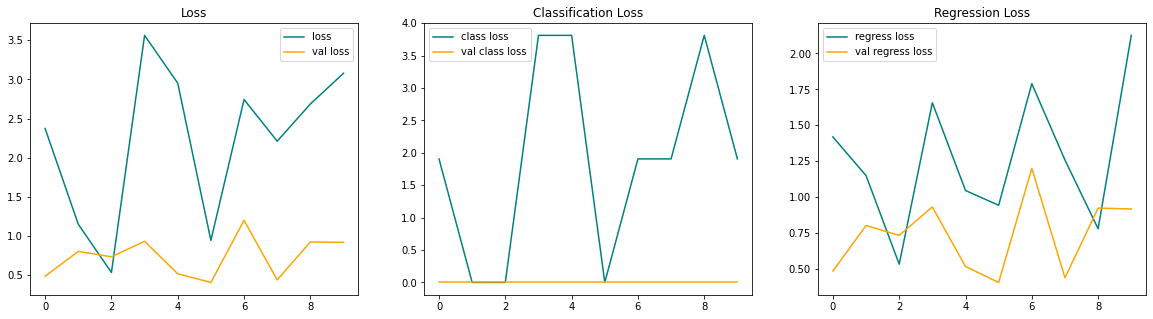

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_val_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()
